In [1]:
import sys
import os

current_directory = os.getcwd()

project_directory = os.path.abspath(os.path.join(current_directory, '..'))
if project_directory not in sys.path:
    sys.path.append(project_directory)

import sanity_checks_methods
import ML_algorithms
import pandas as pd
import util_inaccuracy

dataset_path = os.path.join(project_directory, 'dataset/stroke_data.csv')
df = pd.read_csv(dataset_path)

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])

df = sanity_checks_methods.clean_dataset(df)
df_to_test = df.copy()

adding 10% of inaccuracies in avg_glucose_level values

ADDING 10% TO FEATURE: avg_glucose_level
--------------------------------------
Modifying 936 rows in column 'avg_glucose_level'
Rows to modify: [1192, 9058, 1776, 8869, 816, 1156, 700, 7111, 366, 7780, 2542, 8880, 5358, 4763, 6888, 6244, 6137, 8204, 6590, 2479, 251, 4851, 237, 7346, 5004, 7561, 7037, 5026, 1373, 5697, 8147, 857, 8099, 3000, 2494, 5093, 144, 5122, 7909, 5909, 8724, 1762, 6134, 6313, 4171, 2164, 5861, 3050, 6054, 7541, 396, 806, 2655, 5509, 8767, 5679, 4452, 890, 7370, 2799, 352, 6082, 6300, 3495, 4570, 3820, 8714, 6173, 9152, 3939, 1348, 8504, 5103, 2076, 3056, 7436, 5935, 8881, 4644, 6248, 5201, 140, 1209, 2267, 2477, 9224, 403, 6768, 1454, 6459, 8608, 7660, 4553, 5966, 2094, 7875, 3349, 4625, 6474, 339, 4193, 5507, 3551, 8646, 3965, 948, 9223, 6852, 6404, 7388, 6689, 8085, 756, 7900, 8513, 161, 7201, 1927, 6575, 5942, 1371, 7335, 2, 2439, 2560, 3032, 8834, 1404, 3972, 4436, 2135, 8484, 7499, 2535, 3143, 7529, 2724, 5342, 5924, 622, 1178, 211, 2596, 3794, 6685, 1246, 

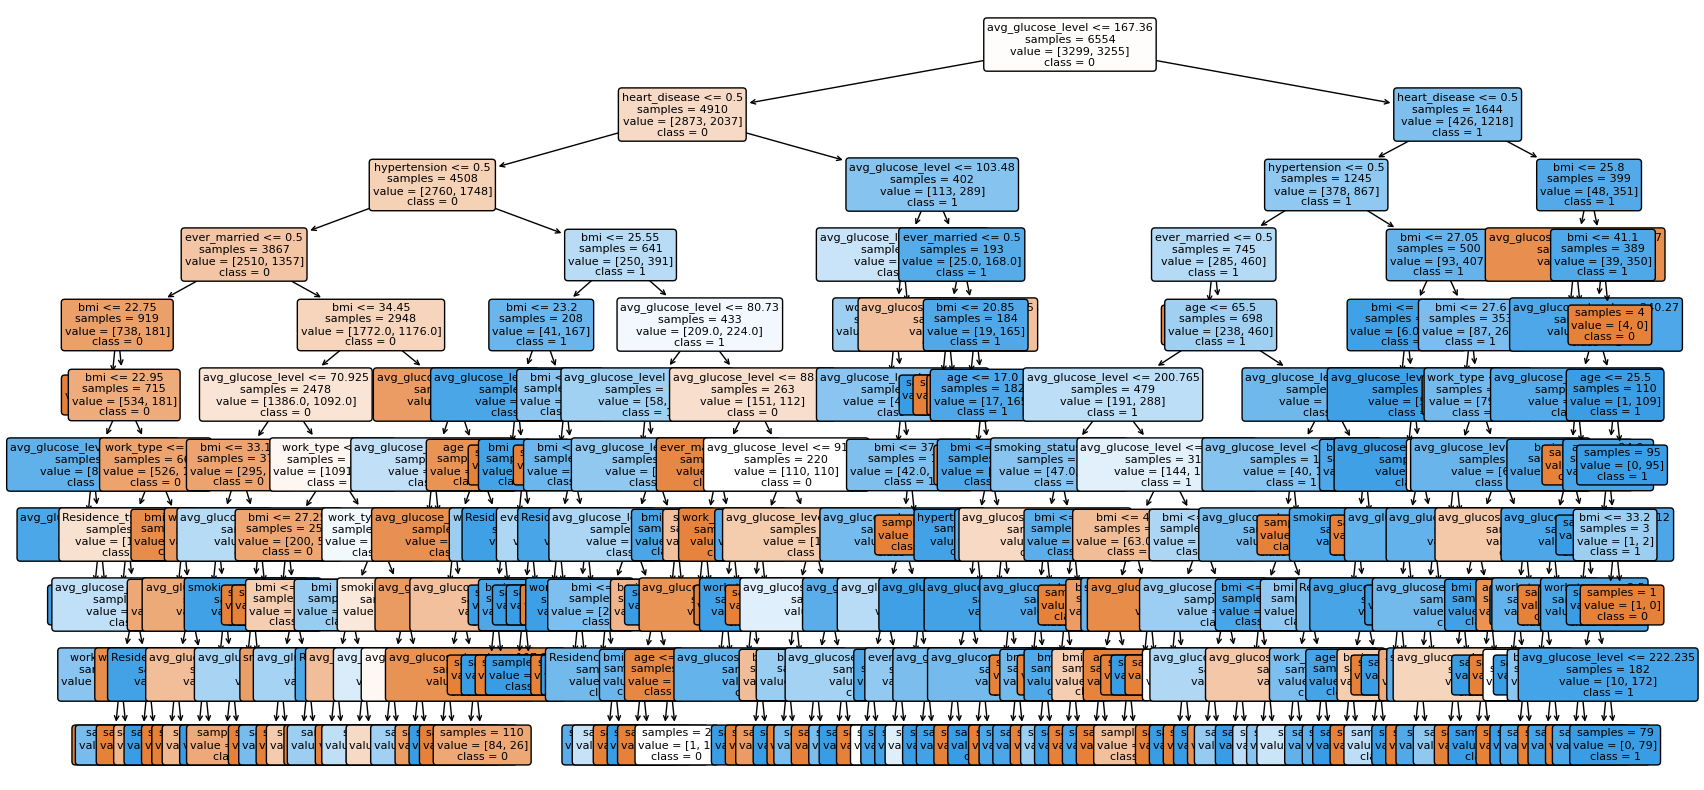

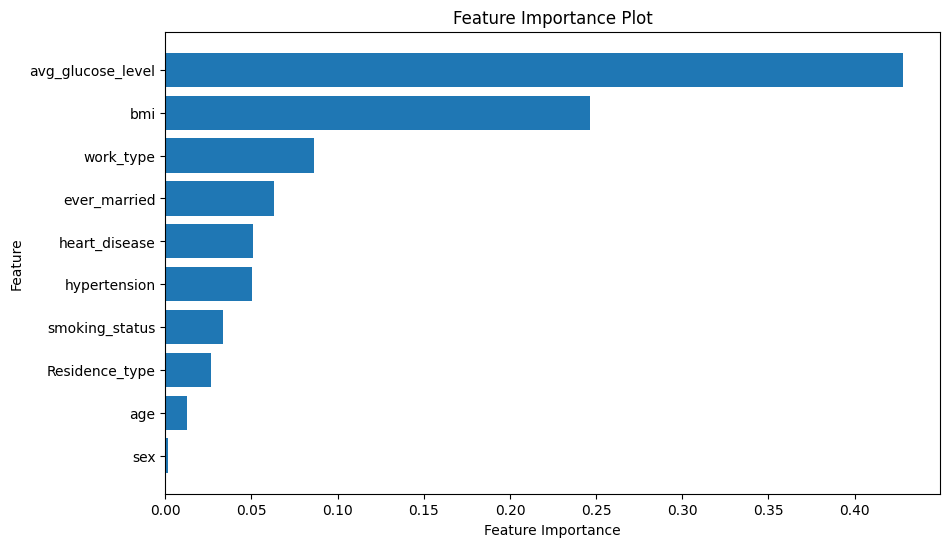

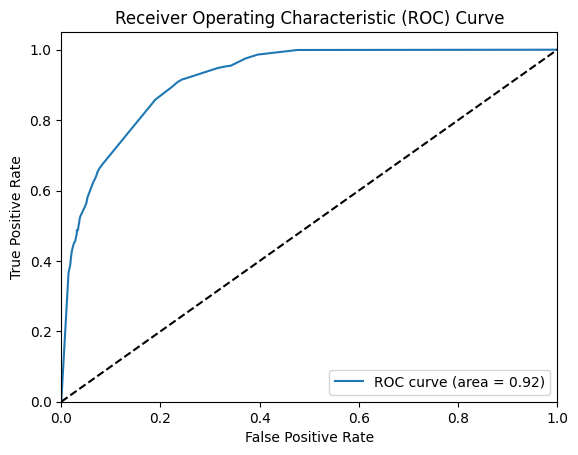

AUC Score: 0.9179439584125776


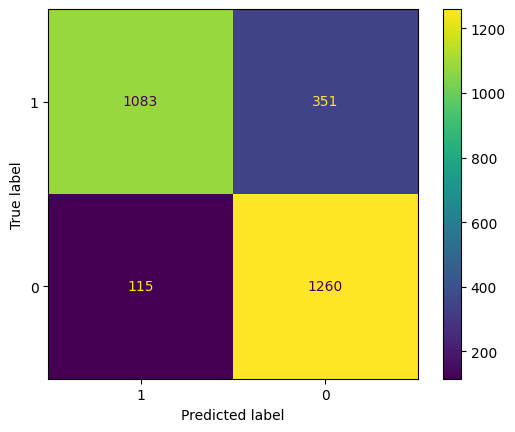

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7935943060498221, 0.8398576512455516, 0.800711743772242, 0.8256227758007118, 0.8718861209964412, 0.7722419928825622, 0.8256227758007118, 0.7473309608540926, 0.800711743772242, 0.8142857142857143]
Mean accuracy: 0.8091865785460092
95% confidence interval: (0.7841592740809493, 0.834213883011069)


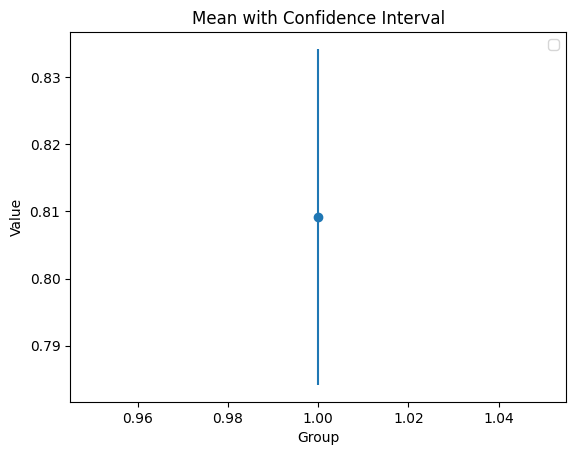


SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1434
           1       0.78      0.88      0.83      1375

    accuracy                           0.82      2809
   macro avg       0.82      0.82      0.82      2809
weighted avg       0.82      0.82      0.82      2809



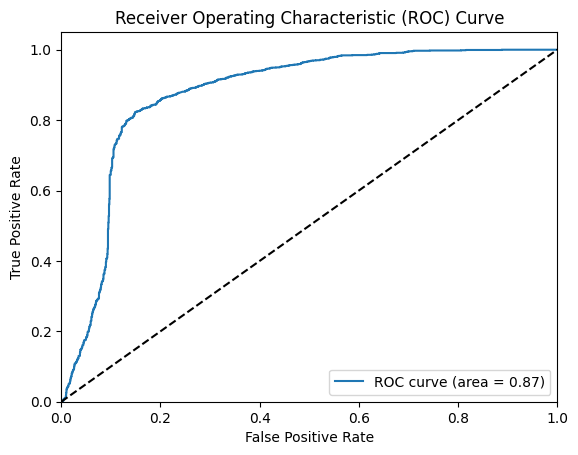

AUC Score: 0.8734986686953213


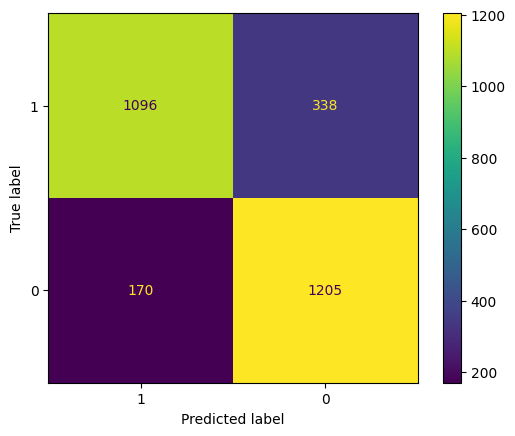

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7722419928825622, 0.7722419928825622, 0.7686832740213523, 0.8042704626334519, 0.7615658362989324, 0.7722419928825622, 0.7758007117437722, 0.7437722419928826, 0.7900355871886121, 0.7178571428571429]
Mean accuracy: 0.7678711235383833
95% confidence interval: (0.7509109149595765, 0.78483133211719)


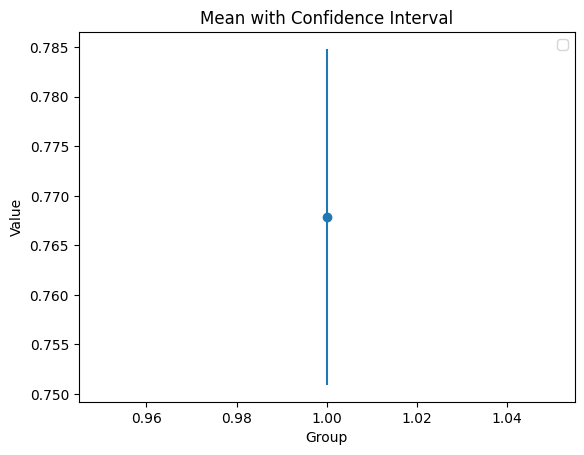

In [2]:

print('ADDING 10% TO FEATURE: avg_glucose_level')
print('--------------------------------------')
df_modified = util_inaccuracy.modify_values('avg_glucose_level', df, 10)

print('\nDECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_glucose_dt, y_test_glucose_dt, decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
mean_accuracy_dt_glucose, confidence_interval_dt_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_to_test)

print('\nSVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_glucose_svm, y_test_glucose_svm, svm = ML_algorithms.model_svm(df_modified, df_to_test)
mean_accuracy_svm_glucose, confidence_interval_svm_glucose = ML_algorithms.k_fold_cross_validation_dt(svm, df_to_test)


adding 10% of inaccuracies in bmi

ADDING 10% TO FEATURE: bmi
--------------------------------------
Modifying 936 rows in column 'bmi'
Rows to modify: [5295, 4959, 5548, 3787, 1746, 6181, 6506, 998, 4818, 2521, 5432, 9325, 2896, 4124, 7214, 3425, 7479, 7342, 3001, 3821, 14, 5379, 2863, 4701, 5353, 9240, 872, 6279, 5971, 2350, 2498, 2213, 3033, 8382, 4225, 5893, 7427, 5475, 8502, 7200, 4629, 6753, 9067, 4298, 6163, 2432, 6177, 8847, 1580, 366, 8872, 7003, 8693, 3361, 7065, 8929, 330, 2843, 7383, 2795, 6601, 3023, 6751, 2541, 8512, 4429, 5866, 5603, 5918, 2834, 7497, 3858, 2875, 5355, 4633, 4462, 2401, 6047, 9129, 2452, 4912, 7015, 6222, 7067, 3098, 4496, 940, 3251, 7001, 4877, 3963, 6895, 7489, 9106, 5651, 4368, 7353, 2946, 427, 3019, 1849, 8445, 5588, 8271, 3895, 3277, 2389, 1980, 4802, 8457, 4564, 1218, 3757, 5381, 4892, 69, 4211, 6561, 2429, 2889, 5255, 3280, 7144, 253, 6452, 1563, 7824, 4517, 8158, 4104, 1315, 4110, 3710, 4600, 8277, 1825, 2587, 1002, 7072, 1921, 9062, 2482, 3863, 8553, 2508, 2178, 1818, 1234, 2284,

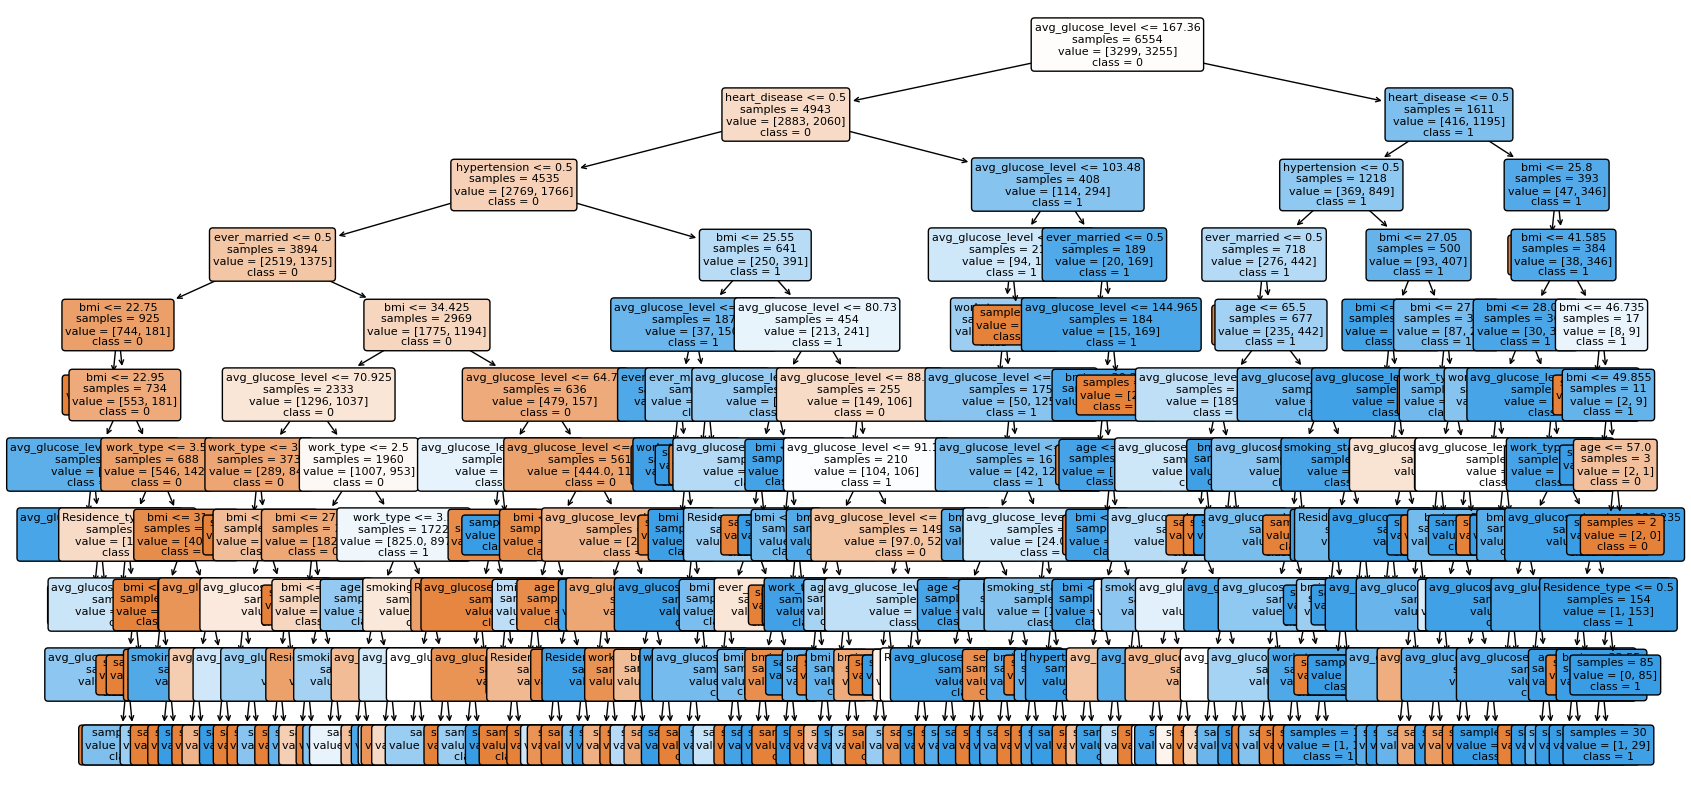

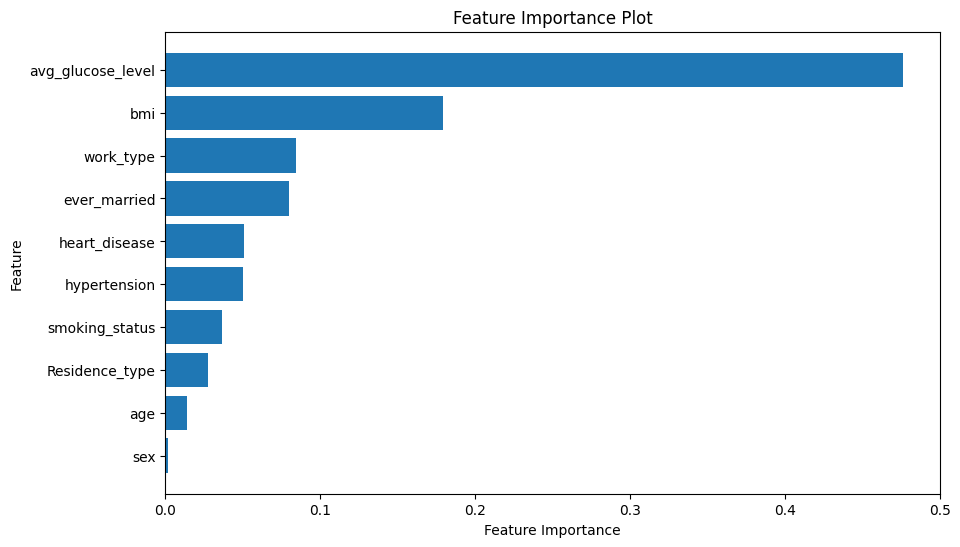

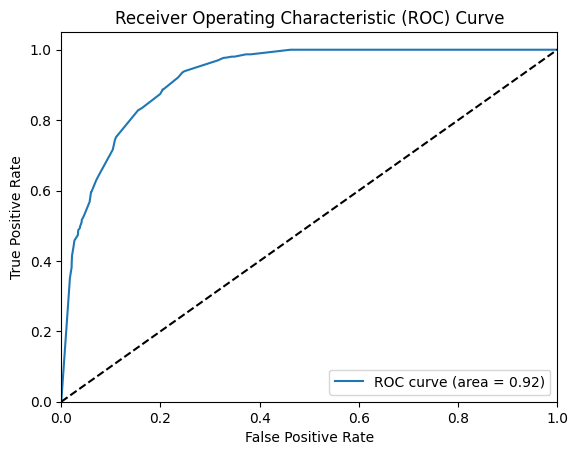

AUC Score: 0.9220233295296056


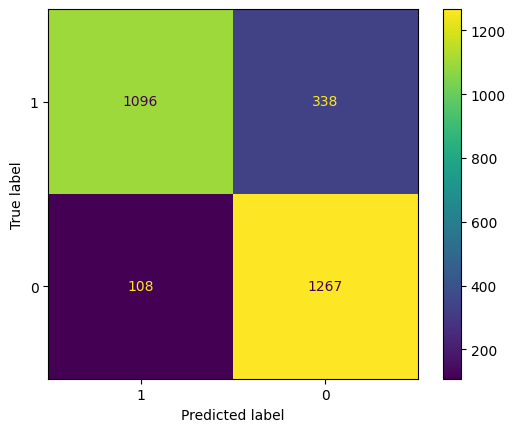

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8113879003558719, 0.8149466192170819, 0.7722419928825622, 0.8434163701067615, 0.8220640569395018, 0.8362989323843416, 0.800711743772242, 0.8398576512455516, 0.7793594306049823, 0.8]
Mean accuracy: 0.8120284697508897
95% confidence interval: (0.7945361768103002, 0.8295207626914792)


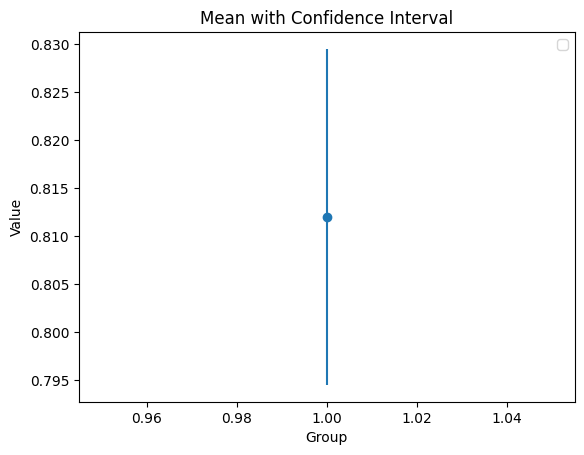


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1434
           1       0.77      0.87      0.82      1375

    accuracy                           0.81      2809
   macro avg       0.81      0.81      0.81      2809
weighted avg       0.81      0.81      0.81      2809



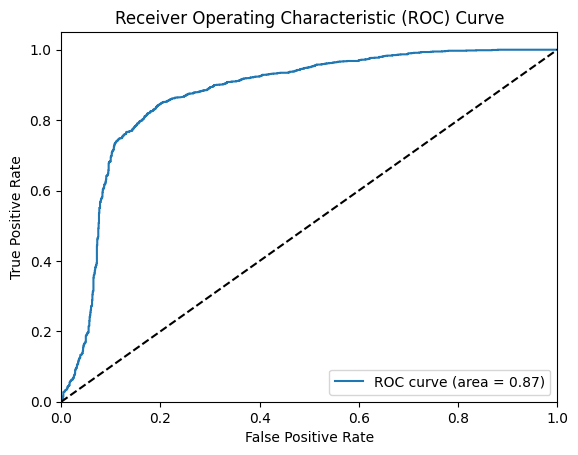

AUC Score: 0.8707305692912387


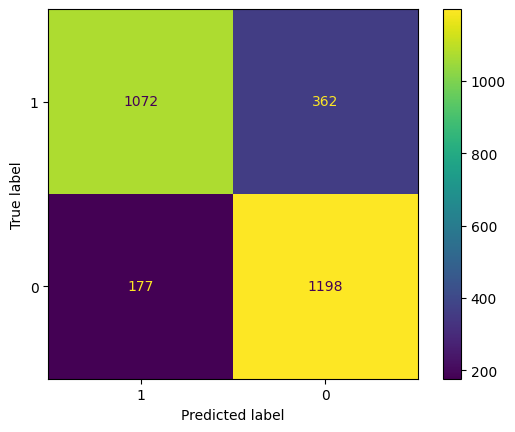

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7686832740213523, 0.7686832740213523, 0.8042704626334519, 0.7651245551601423, 0.7437722419928826, 0.7402135231316725, 0.7651245551601423, 0.7829181494661922, 0.797153024911032, 0.8142857142857143]
Mean accuracy: 0.7750228774783935
95% confidence interval: (0.7574780723499979, 0.7925676826067891)


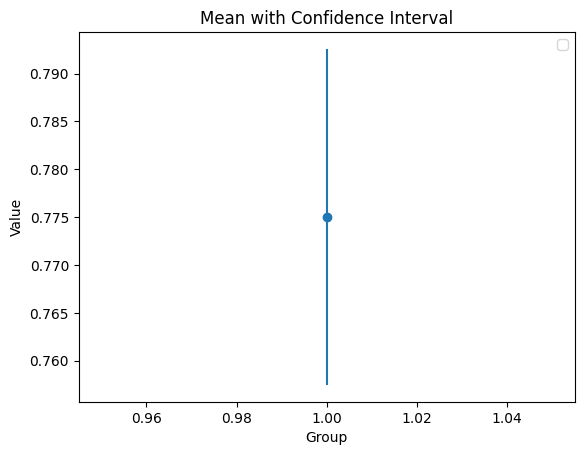

In [3]:
print('ADDING 10% TO FEATURE: bmi')
print('--------------------------------------')
df_modified= util_inaccuracy.modify_values('bmi',df, 10)
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_bmi_dt, y_test_bmi_dt, decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
mean_accuracy_dt_bmi, confidence_interval_dt_bmi = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_bmi_svm, y_test_bmi_svm, svm = ML_algorithms.model_svm(df_modified, df_to_test)
mean_accuracy_svm_bmi, confidence_interval_svm_bmi = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test)

inaccuracies on bmi and avg_glucose_level features

ADDING 10% TO FEATURE: avg_glucose_level & bmi
--------------------------------------
Modifying 936 rows in column 'avg_glucose_level'
Rows to modify: [8298, 3226, 6687, 6106, 2153, 2129, 7677, 4420, 9162, 1691, 5354, 5466, 7857, 1183, 6509, 2164, 7835, 411, 1232, 4778, 6988, 8125, 4681, 9166, 2447, 1178, 9138, 6090, 5081, 1325, 1554, 1199, 3435, 7002, 8564, 1656, 4724, 4173, 3534, 1623, 7432, 6298, 6643, 2205, 6291, 7013, 2147, 2210, 8445, 7080, 347, 936, 3963, 1195, 4509, 2082, 8969, 2431, 6101, 927, 3424, 2779, 3960, 8526, 9273, 2551, 3938, 2707, 7435, 5972, 3100, 5299, 3844, 5162, 6799, 138, 8027, 1617, 3509, 6495, 7323, 4663, 1869, 8054, 4255, 4895, 5389, 6583, 8646, 357, 8688, 3215, 6225, 9277, 1486, 46, 4990, 7762, 5587, 779, 6037, 902, 671, 1711, 8925, 7221, 1057, 1906, 6458, 5452, 5612, 9163, 5709, 1885, 8057, 1115, 5218, 6425, 2994, 841, 6901, 2739, 1670, 7295, 4111, 3752, 5106, 5838, 2576, 2045, 3340, 2854, 2747, 1682, 6413, 4120, 7534, 6899, 8034, 2442, 1055, 8242, 1299, 75

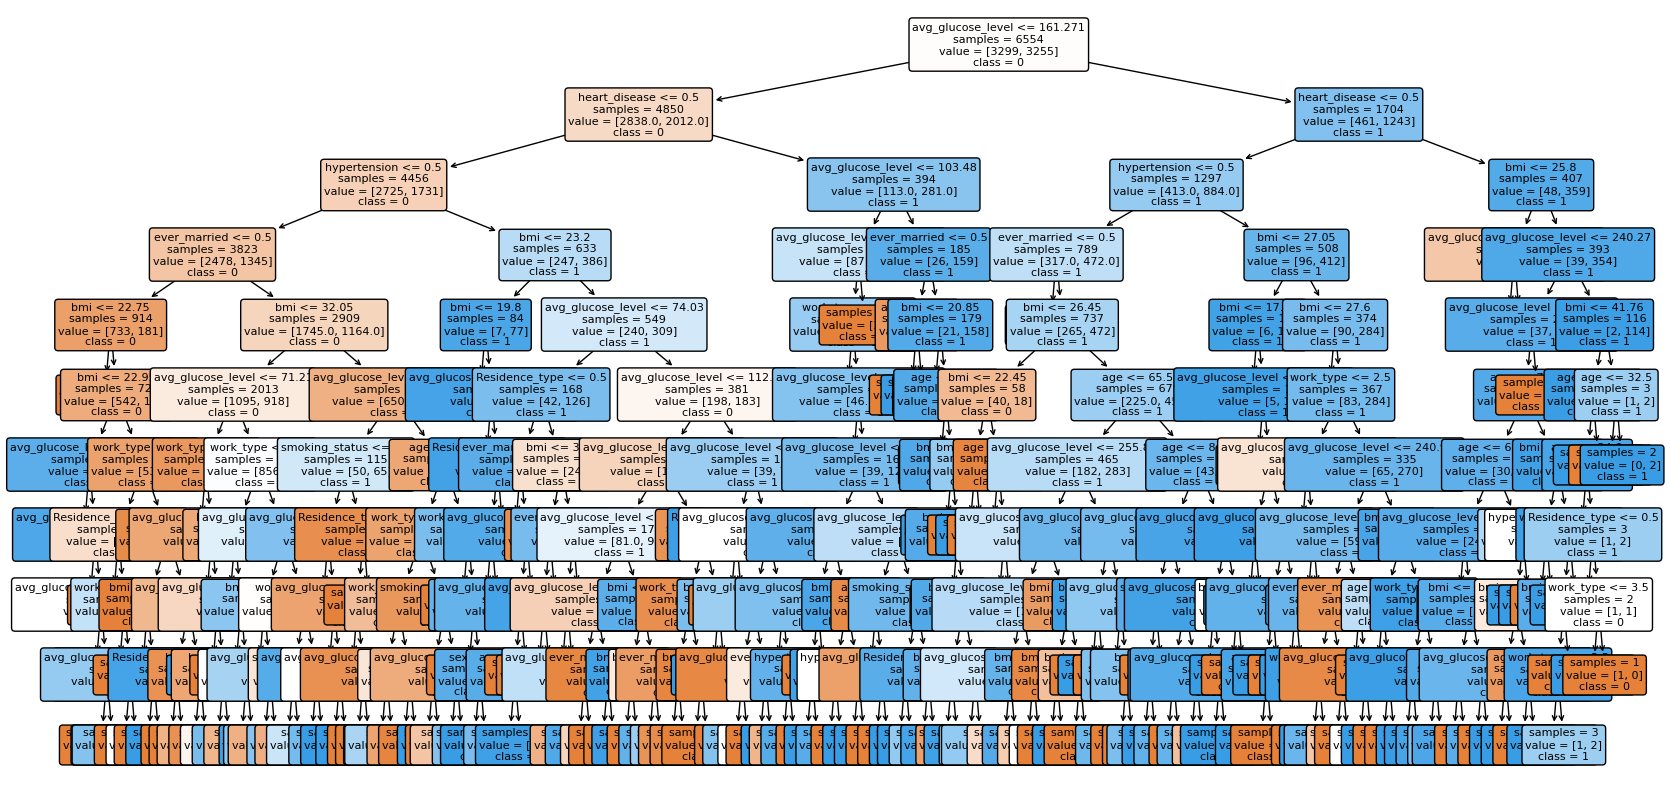

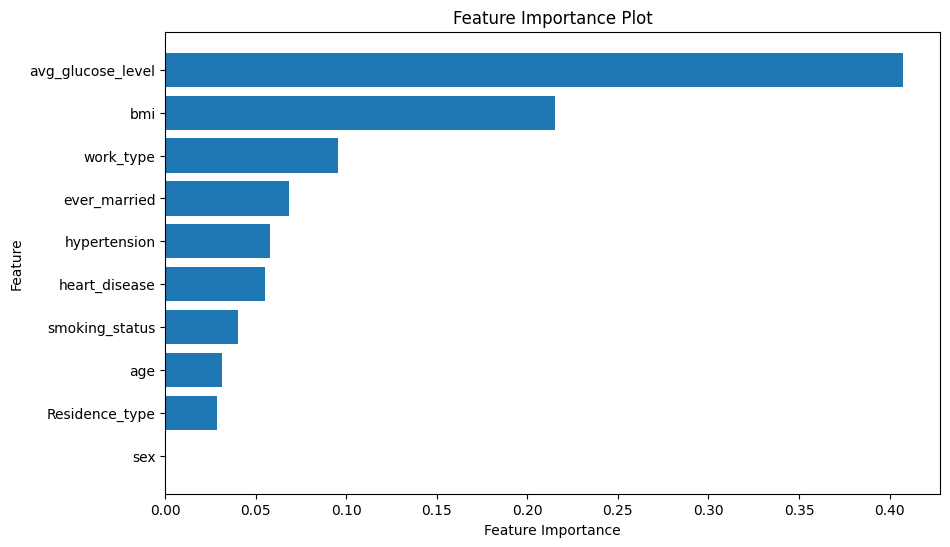

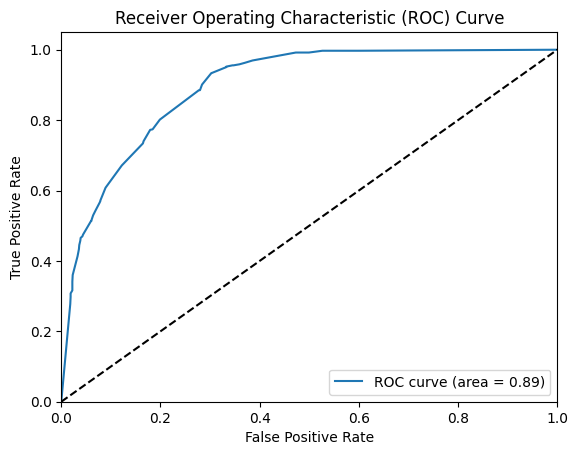

AUC Score: 0.8943499429440853


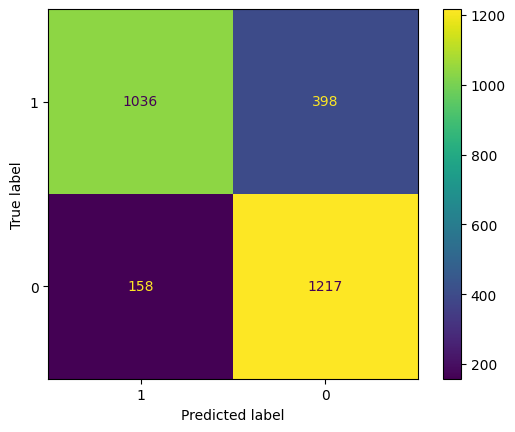

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8612099644128114, 0.8185053380782918, 0.7615658362989324, 0.8291814946619217, 0.8291814946619217, 0.8362989323843416, 0.8185053380782918, 0.8149466192170819, 0.8078291814946619, 0.775]
Mean accuracy: 0.8152224199288256
95% confidence interval: (0.7945416505081802, 0.835903189349471)


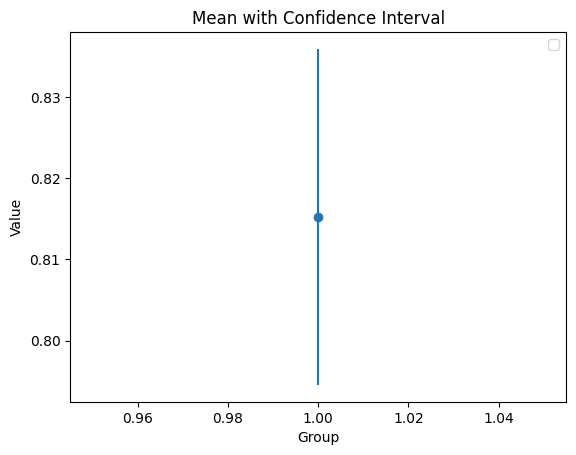


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1434
           1       0.77      0.85      0.81      1375

    accuracy                           0.80      2809
   macro avg       0.80      0.80      0.80      2809
weighted avg       0.80      0.80      0.80      2809



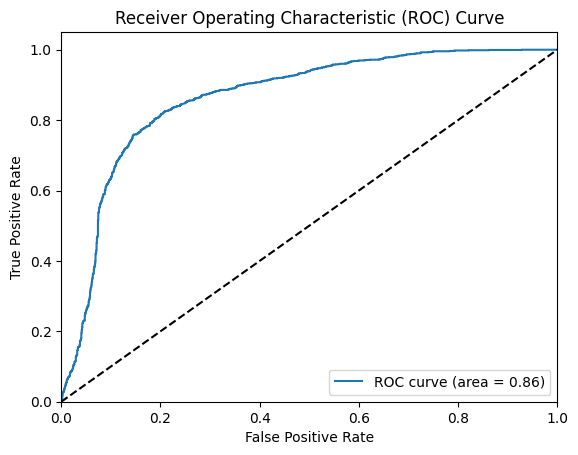

AUC Score: 0.8630630150881198


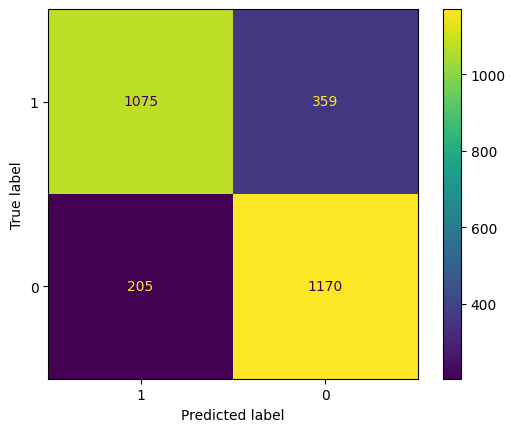

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7722419928825622, 0.7437722419928826, 0.8149466192170819, 0.7437722419928826, 0.7651245551601423, 0.7935943060498221, 0.7437722419928826, 0.8042704626334519, 0.7224199288256228, 0.8142857142857143]
Mean accuracy: 0.7718200305033045
95% confidence interval: (0.7479321562086553, 0.7957079047979537)


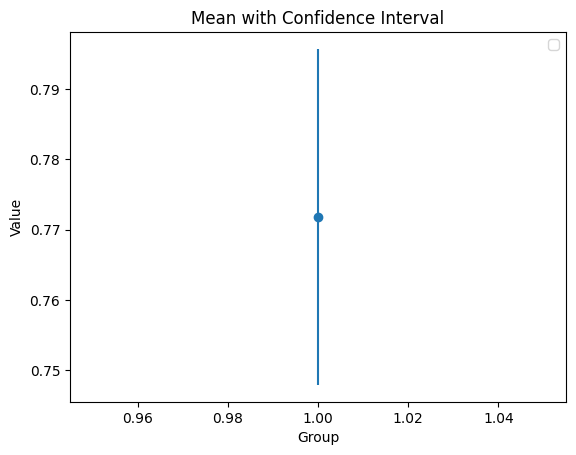

In [4]:
print('ADDING 10% TO FEATURE: avg_glucose_level & bmi')
print('--------------------------------------')
df_modified = util_inaccuracy.modify_values('avg_glucose_level',df, 10)
df_modified = util_inaccuracy.modify_values('bmi',df_modified, 10)
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_bmi_glucose_dt, y_test_bmi_glucose_dt, decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
mean_accuracy_dt_bmi_glucose, confidence_interval_dt_bmi_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_bmi_glucose_svm, y_test_bmi_glucose_svm, svm = ML_algorithms.model_svm(df_modified, df_to_test)
mean_accuracy_svm_bmi_glucose, confidence_interval_svm_bmi_glucose = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

adding inaccuracies to non binary features

ADDING 10% TO MODIFIABLE FEATURES
--------------------------------------
Modifying 936 rows in column 'avg_glucose_level'
Rows to modify: [6207, 7333, 7154, 6023, 5752, 5575, 8307, 7216, 5188, 1721, 1524, 7015, 2563, 477, 1350, 1078, 1993, 3860, 6684, 6950, 198, 1332, 8735, 6555, 3920, 1891, 332, 6456, 8054, 6363, 8048, 4114, 1057, 4042, 1727, 624, 894, 4563, 3987, 4299, 3575, 9003, 2727, 1955, 6542, 9207, 8104, 1112, 3192, 3219, 1585, 5014, 1225, 6996, 3783, 4005, 4977, 1335, 3414, 929, 5630, 5478, 8856, 4982, 2194, 6326, 2916, 7624, 5383, 101, 349, 2496, 6368, 7002, 4454, 6672, 336, 2197, 7850, 7359, 6131, 8303, 6052, 4755, 1599, 7480, 4065, 6167, 7373, 3135, 9291, 7754, 6344, 8404, 4605, 5279, 2664, 6093, 6153, 2362, 7007, 5537, 2377, 5234, 6158, 2213, 1220, 1308, 1448, 2723, 5920, 3010, 2471, 2248, 5394, 1439, 6282, 2252, 5402, 818, 7293, 9181, 5207, 887, 3229, 3172, 7406, 4527, 6526, 7711, 8248, 753, 5772, 7403, 4430, 438, 5459, 9154, 3456, 4401, 4757, 7636, 3565, 3913, 3805, 3555

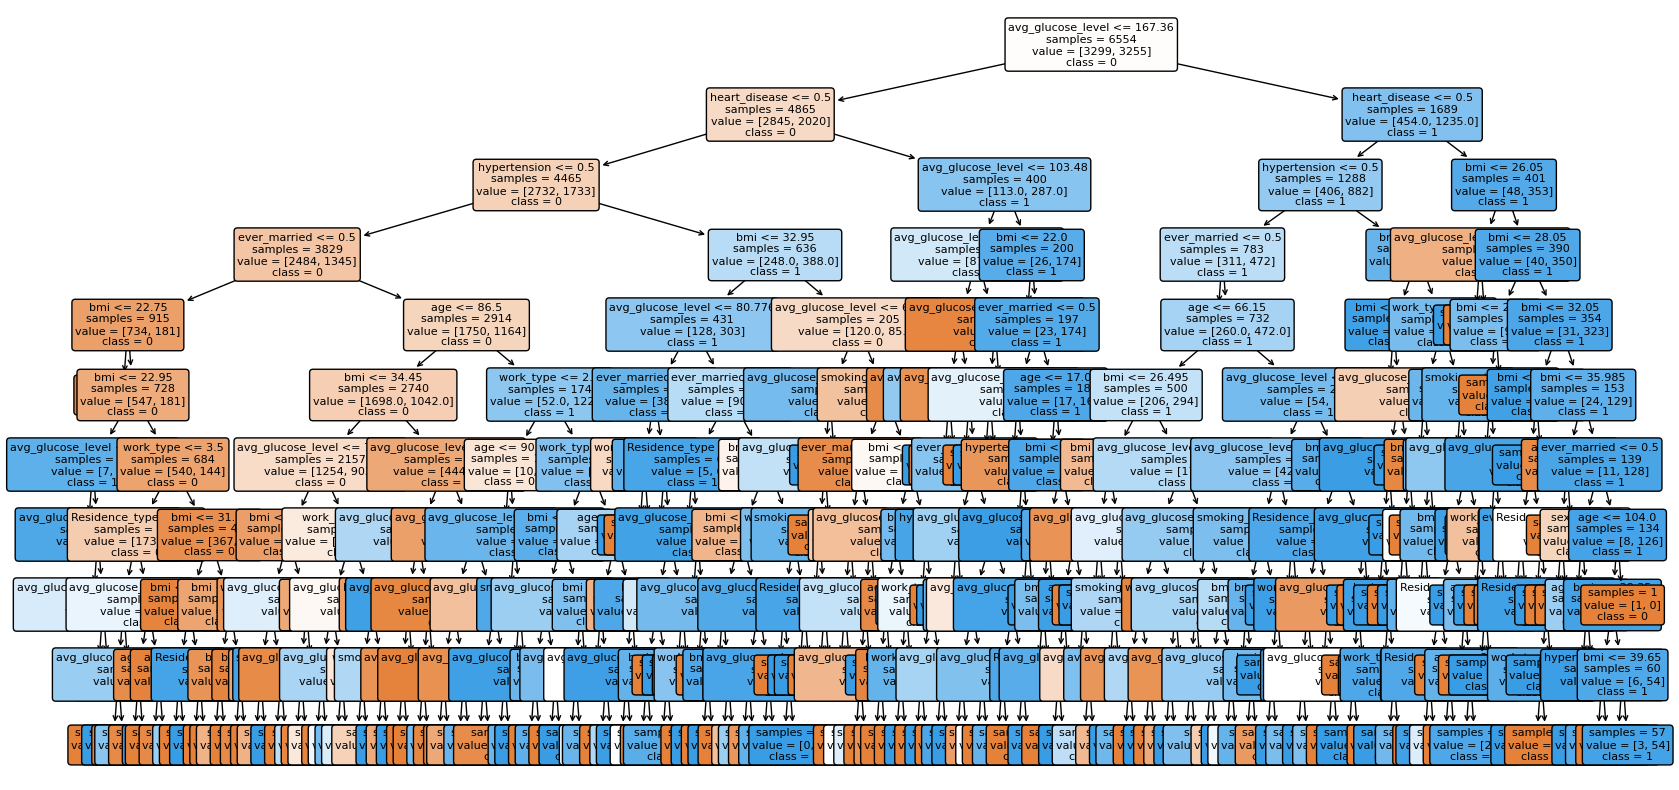

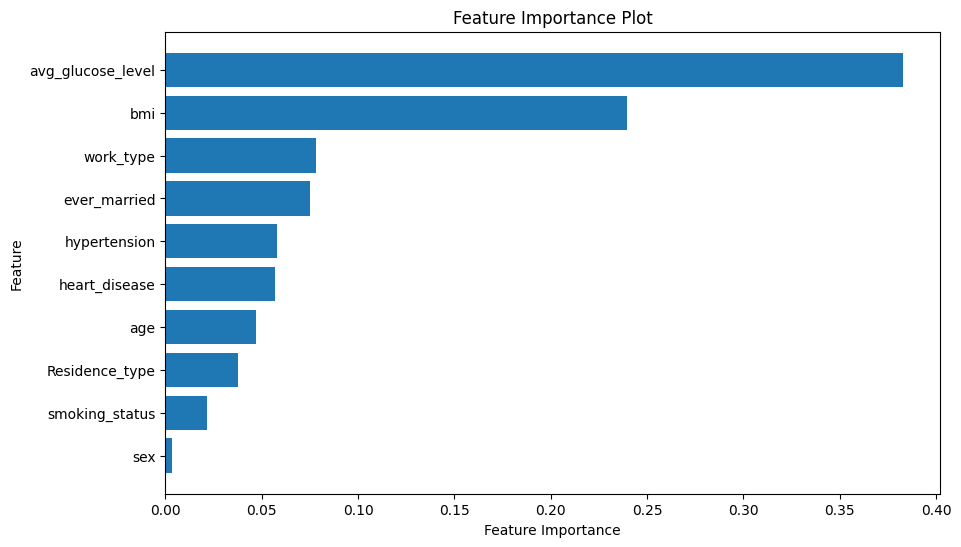

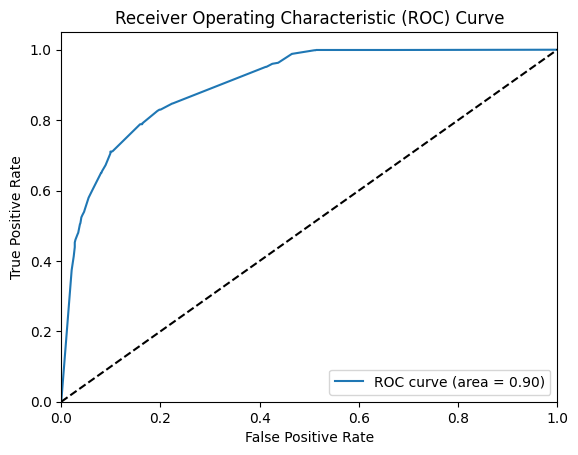

AUC Score: 0.9019226575377202


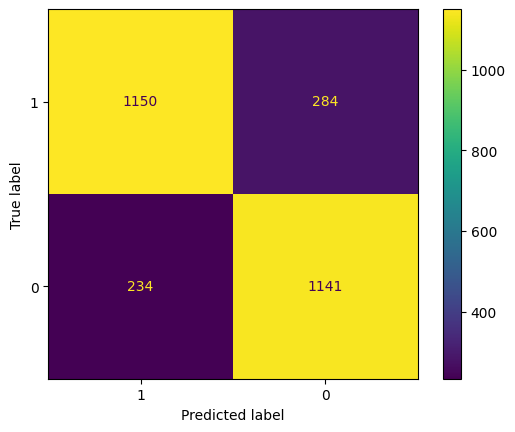

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7793594306049823, 0.800711743772242, 0.7829181494661922, 0.8576512455516014, 0.8327402135231317, 0.7829181494661922, 0.8220640569395018, 0.8185053380782918, 0.7864768683274022, 0.8285714285714286]
Mean accuracy: 0.8091916624300965
95% confidence interval: (0.7901314138393877, 0.8282519110208054)


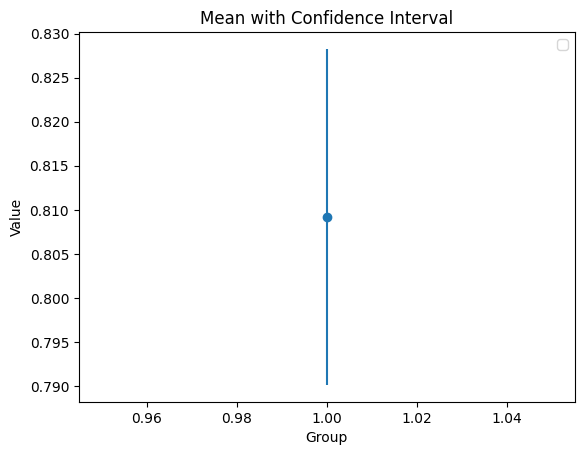


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 1, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77      1434
           1       0.75      0.79      0.77      1375

    accuracy                           0.77      2809
   macro avg       0.77      0.77      0.77      2809
weighted avg       0.77      0.77      0.77      2809



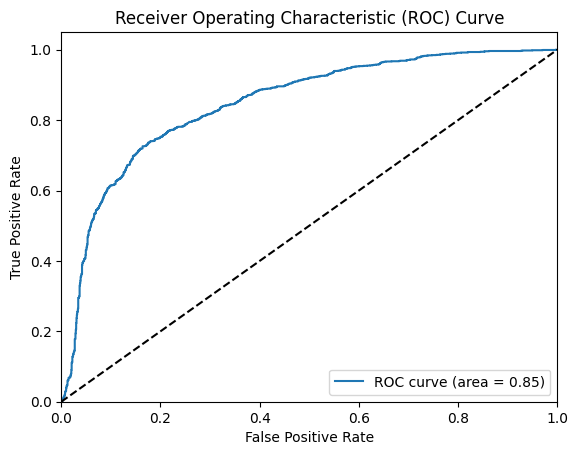

AUC Score: 0.8468756181057436


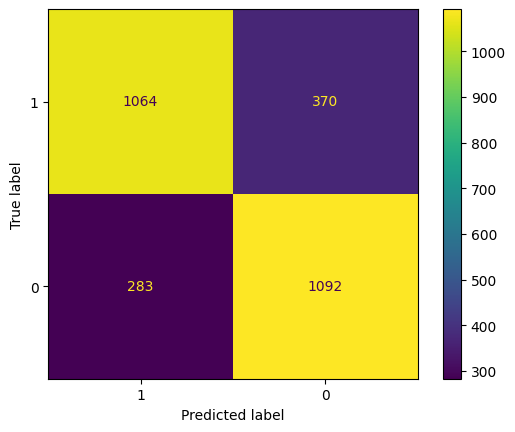

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7864768683274022, 0.7900355871886121, 0.7366548042704626, 0.7544483985765125, 0.800711743772242, 0.8113879003558719, 0.7615658362989324, 0.8113879003558719, 0.7900355871886121, 0.7642857142857142]
Mean accuracy: 0.7806990340620233
95% confidence interval: (0.7626075685567143, 0.7987904995673324)


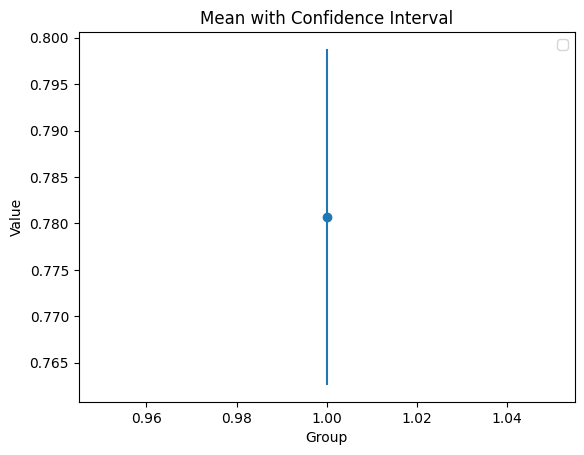

In [5]:
print('ADDING 10% TO MODIFIABLE FEATURES')
print('--------------------------------------')
df_modified = util_inaccuracy.modify_values('avg_glucose_level',df, 10)
for column in ['work_type','age','bmi', 'avg_glucose_level']:
    df_modified = util_inaccuracy.modify_values(column,df_modified, 10)
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_dt, y_test_dt, decision_tree = ML_algorithms.model_dt(df_modified, df_to_test)
mean_accuracy_dt, confidence_interval_dt = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_svm, y_test_svm, svm = ML_algorithms.model_svm(df_modified, df_to_test)
mean_accuracy_svm, confidence_interval_svm = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test)

## Conclusion

### ROC CURVE - Decision Tree

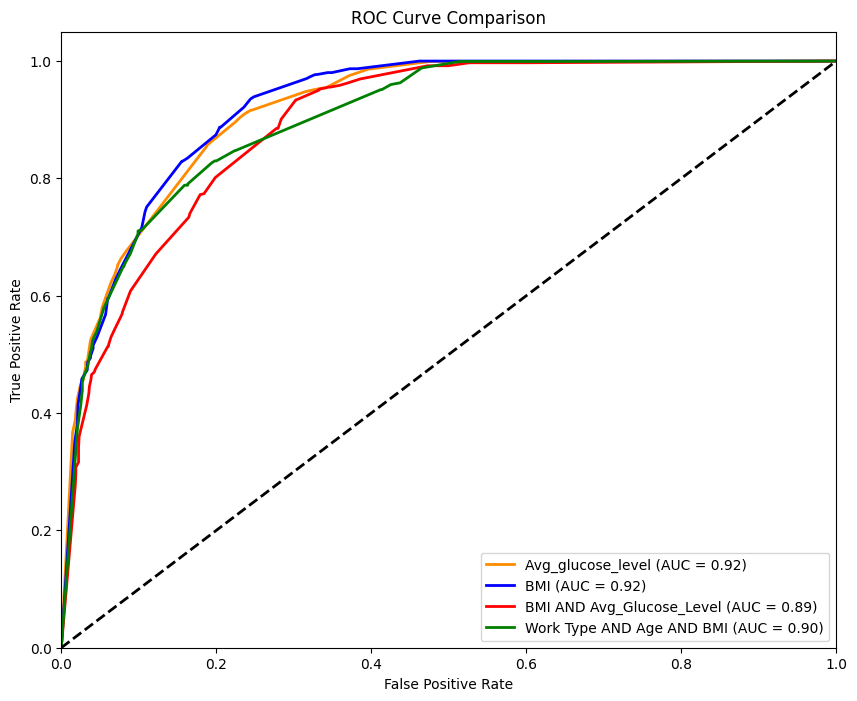

In [6]:
roc_results = [
    (y_pred_prob_glucose_dt, y_test_glucose_dt, 'Avg_glucose_level'),
    (y_pred_prob_bmi_dt, y_test_bmi_dt, 'BMI'),
    (y_pred_prob_bmi_glucose_dt, y_test_bmi_glucose_dt, 'BMI AND Avg_Glucose_Level'),
    (y_pred_prob_dt, y_test_dt, 'Work Type AND Age AND BMI')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### ROC CURVE - Support Vector Machine

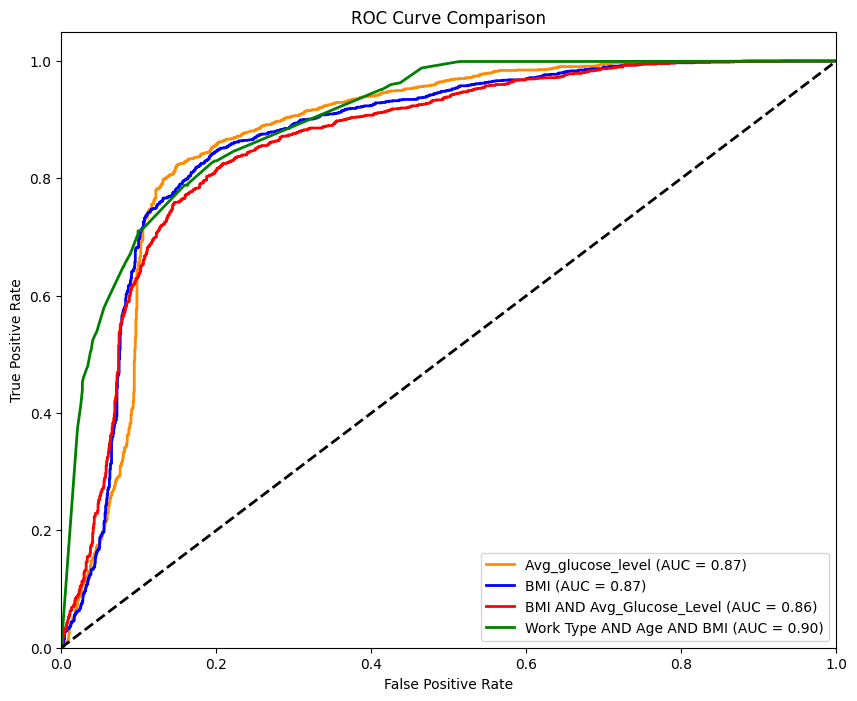

In [7]:
roc_results = [
    (y_pred_prob_glucose_svm, y_test_glucose_svm, 'Avg_glucose_level'),
    (y_pred_prob_bmi_svm, y_test_bmi_svm, 'BMI'),
    (y_pred_prob_bmi_glucose_svm, y_test_bmi_glucose_svm, 'BMI AND Avg_Glucose_Level'),
    (y_pred_prob_dt, y_test_svm, 'Work Type AND Age AND BMI')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### Confidence Interval - Decision Tree

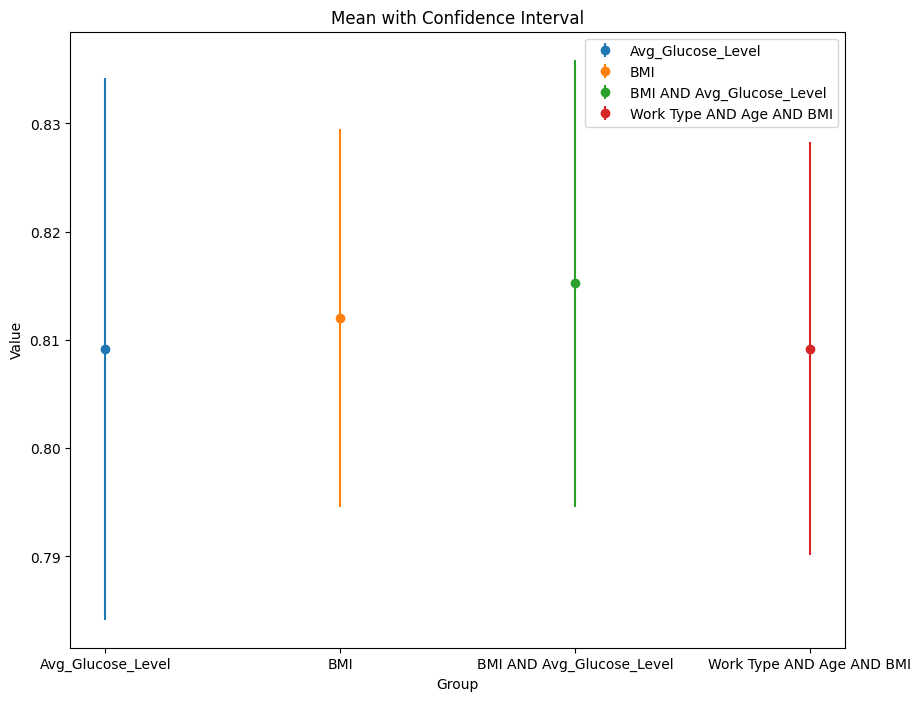

In [8]:
model_results = [
    ('Avg_Glucose_Level', mean_accuracy_dt_glucose, confidence_interval_dt_glucose),
    ('BMI', mean_accuracy_dt_bmi, confidence_interval_dt_bmi),
    ('BMI AND Avg_Glucose_Level', mean_accuracy_dt_bmi_glucose, confidence_interval_dt_bmi_glucose),
    ('Work Type AND Age AND BMI', mean_accuracy_dt, confidence_interval_dt)
]
ML_algorithms.plot_confidence_intervals(model_results)